In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

#----> dataframes:
data_frame = pd.read_csv('produtos2.csv')
data_frame2 = pd.read_csv('produtos3.csv')

#dataframe ---> planilha com cabeçalho padrão descritivo 
#dataframe2 ----> planilha com cabeçalho adaptado ao código


In [2]:
data_frame.dtypes

Data                                        object
Produto                                     object
Lote                                         int64
Quantidade Produzida (kg)                    int64
Temperatura Média (°C)                       int64
Pressão Média (atm)                        float64
Tempo de Reação (horas)                    float64
Pureza (%)                                 float64
Número de Funcionários                       int64
Tempo de Inatividade da Máquina (horas)    float64
Custo de Produção (R$)                     float64
dtype: object

In [3]:
data_frame.head()

,Data,Produto,Lote,Quantidade Produzida (kg),Temperatura Média (°C),Pressão Média (atm),Tempo de Reação (horas),Pureza (%),Número de Funcionários,Tempo de Inatividade da Máquina (horas),Custo de Produção (R$)
0,2024-01-01,Ácido Sulfúrico,6980,6964,75,2.8,3.3,96.0,12,0.1,26662.76
1,2024-01-01,Soda Cáustica,1605,3643,63,2.4,5.3,95.8,8,0.1,11966.38
2,2024-01-01,Ácido Nítrico,3447,3887,64,1.7,5.3,96.5,10,0.3,14651.69
3,2024-01-01,Amoníaco,3179,2347,86,1.8,5.7,97.0,10,0.6,6773.48
4,2024-01-01,Cloro,8931,6768,51,1.7,5.3,97.2,9,0.1,21873.63


In [4]:
data_frame.tail()

,Data,Produto,Lote,Quantidade Produzida (kg),Temperatura Média (°C),Pressão Média (atm),Tempo de Reação (horas),Pureza (%),Número de Funcionários,Tempo de Inatividade da Máquina (horas),Custo de Produção (R$)
795,2024-03-20,Etanol,8544,2139,85,2.4,7.1,99.0,7,0.2,5653.36
796,2024-03-20,Metanol,8088,2117,63,2.0,2.7,96.4,8,0.3,7191.65
797,2024-03-20,Formaldeído,3828,2079,58,2.0,3.4,97.5,9,0.2,8232.68
798,2024-03-20,Benzeno,7108,2369,80,3.0,5.0,96.7,9,0.3,7349.48
799,2024-03-20,Tolueno,7848,3685,75,2.9,5.8,95.1,7,0.0,12805.87


In [5]:
data_frame.nunique()

Data                                        80
Produto                                     10
Lote                                       759
Quantidade Produzida (kg)                  740
Temperatura Média (°C)                      59
Pressão Média (atm)                         25
Tempo de Reação (horas)                     57
Pureza (%)                                  61
Número de Funcionários                      11
Tempo de Inatividade da Máquina (horas)     29
Custo de Produção (R$)                     800
dtype: int64

In [6]:
data_frame2 = data_frame2.drop('Pressao_Media_atm',axis=1)
data_frame2 = data_frame2.drop('Lote',axis=1)
data_frame2 = data_frame2.drop('Tempo_de_Reação_horas',axis=1)
data_frame2 = data_frame2.drop('Pureza_porcentagem',axis=1)
data_frame2 = data_frame2.drop('Produto',axis=1)
data_frame2 = data_frame2.drop('Temperatura_Media_celsius',axis=1)

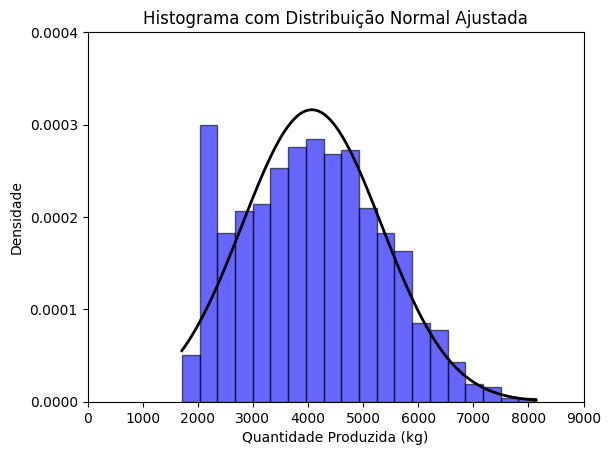

In [7]:
try:
    x = data_frame2['Quantidade_Produzida_kg']

    # média e o desvio padrão dos dados
    mu = x.mean()
    sigma = x.std()

    # histograma
    fig, ax = plt.subplots()
    ax.hist(x, bins=20, density=True, alpha=0.6, color='b', edgecolor="black") 

    # curva normal
    x_plot = np.linspace(x.min(), x.max(), 100) 
    p = stats.norm.pdf(x_plot, mu, sigma) 
    ax.plot(x_plot, p, 'k', linewidth=2) 

    # Configurações do gráfico
    ax.set(xlim=(0, 9000), xticks=np.arange(0, 9001, 1000), 
           ylim=(0, 0.0004), yticks=np.linspace(0, 0.0004, 5))
    ax.set_xlabel("Quantidade Produzida (kg)")
    ax.set_ylabel("Densidade")
    ax.set_title("Histograma com Distribuição Normal Ajustada")

    plt.show()

except FileNotFoundError:
    print("Erro: Arquivo não encontrado.")
except pd.errors.ParserError:
    print("Erro ao ler o arquivo CSV.")
except KeyError as e:
    print(f"Erro: Coluna '{e}' não encontrada no DataFrame.")
except Exception as e:
    print(f"Ocorreu um erro: {e}")

In [8]:
data_frame2.describe()

,Quantidade_Produzida_kg,Numero_de_Funcionarios,Inatividade da Maquina_horas,Custo_de_producao_reais
count,800.000000,800.000000,800.000000,800.000000
mean,4069.568750,8.902500,0.485625,13000.086538
std,1262.271576,1.974301,0.482827,4762.433490
min,1712.000000,4.000000,0.000000,4301.320000
25%,3066.250000,7.000000,0.100000,9179.475000
50%,4041.000000,9.000000,0.400000,12615.400000
75%,4964.000000,10.000000,0.700000,15883.640000
max,8139.000000,14.000000,3.900000,29250.160000


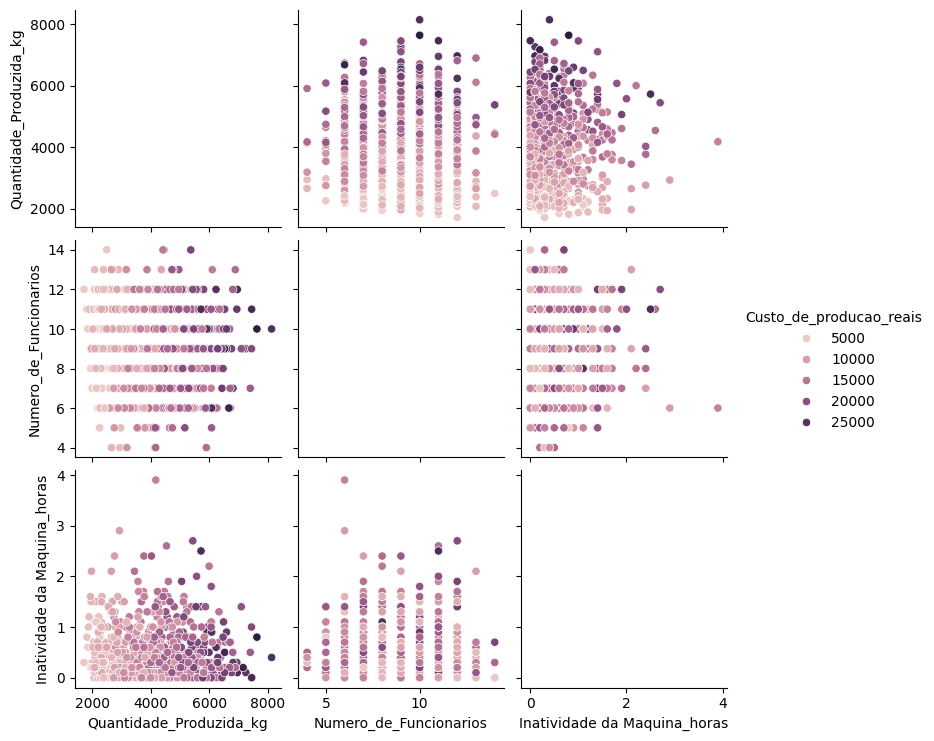

In [10]:
import seaborn as sns
sns.pairplot(data_frame2, hue='Custo_de_producao_reais')

In [ ]:
# >> Relatório do pair plot:

# > Relação Custo de Produção com:

# -- Quantidade Produzida: 
# - correlação positiva moderada a forte
# - relação não perfeitamente linear

# -- Número de Funcionários:
# - pouca influência no custo de produção e na quantidade produzida

# > Relação Quantidade Produzida x Inatividade da Máquina:
# - correlação negativa moderada
# - inversamente proporcional 

# >> Próximos passos: 
# - necessário retirar a coluna Número de Funcionários pela baixa correlação com as outras colunas
# - fazer novas análises com boxplot